<a href="https://colab.research.google.com/github/Varsha-R/Deep-Learning/blob/main/Intro_to_DL_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import, pre-processing and data preparation

In [100]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [101]:
# Reading data from CSV
raw_dataset = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv', na_values='?')
dataset = raw_dataset.copy()
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [102]:
# Checking NA values
dataset.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [103]:
# Cleaning up the dataset by dropping NA values
dataset = dataset.dropna()

In [104]:
# One-hot encoding the categorical column
dataset = pd.get_dummies(dataset, columns=['ocean_proximity'], prefix='', prefix_sep='')
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [105]:
# Splitting data into training and test sets
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
print(len(train_dataset), "train +", len(test_dataset), "test")

16346 train + 4087 test


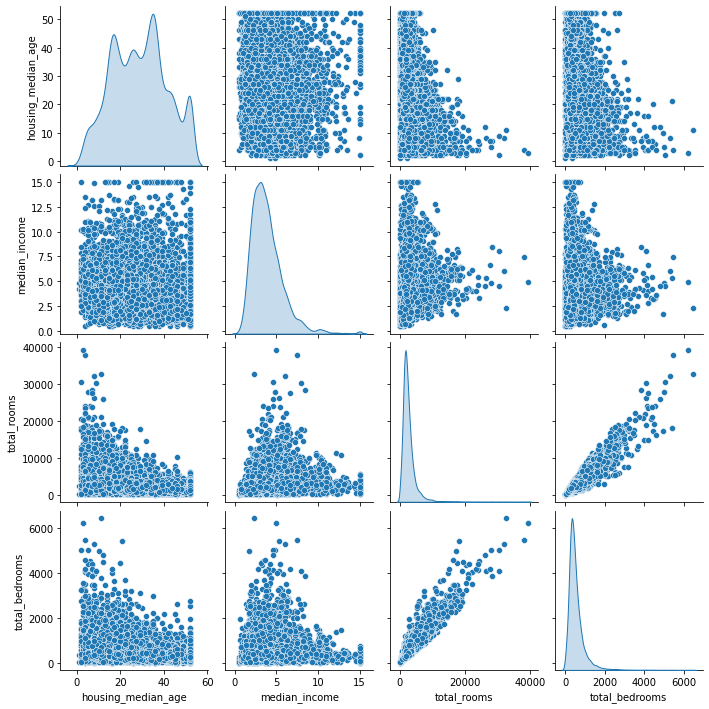

In [106]:
# Visualizing data
sns.pairplot(train_dataset[['housing_median_age', 'median_income', 'total_rooms', 'total_bedrooms']], diag_kind='kde')

In [107]:
# Getting more information on the training data
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
longitude,-119.564154,2.002618
latitude,35.630318,2.138574
housing_median_age,28.664505,12.556764
total_rooms,2622.235776,2169.548287
total_bedrooms,535.281659,418.469078
population,1416.087055,1103.842065
households,496.758167,379.109535
median_income,3.869337,1.902228
median_house_value,206916.154411,115676.394484
<1H OCEAN,0.441454,0.496576


In [108]:
# Separate the output label from dataset
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('median_house_value')
test_labels = test_features.pop('median_house_value')

## Multi-use variables and functions

In [109]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [110]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [Median house value]')
  plt.legend()
  plt.grid(True)

In [111]:
def plot_true_vs_pred(test_preds):
  a = plt.axes(aspect='equal')
  plt.scatter(test_labels[:300], test_preds[:300])
  plt.xlabel('True Values [Median house value]')
  plt.ylabel('Predictions [Median house value]')
  lims = [0, 500000]
  plt.xlim(lims)
  plt.ylim(lims)
  _ = plt.plot(lims, lims, color='k')

In [112]:
def plot_error_distribution(test_preds):
  error = test_preds - test_labels
  plt.hist(error)
  plt.xlabel('Prediction Error [Median house value]')
  _ = plt.ylabel('Count')

In [113]:
test_results = {}
y_Ax = []

# Task 1 - Variation 1 (1 layer)

In [114]:
dnn_model = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

dnn_model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [115]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2, epochs=10, verbose=0)

CPU times: user 8.19 s, sys: 683 ms, total: 8.87 s
Wall time: 7.29 s


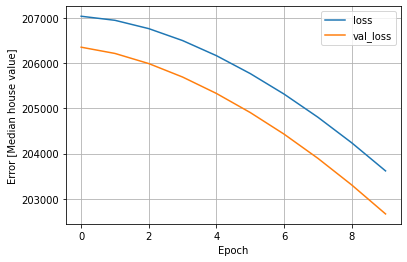

In [116]:
plot_loss(history)

In [117]:
test_results['1_layer'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
y_Ax.append(test_results['1_layer'])
test_predictions = dnn_model.predict(test_features).flatten()

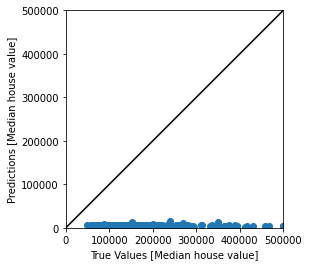

In [118]:
plot_true_vs_pred(test_predictions)

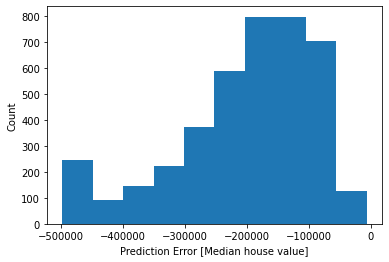

In [119]:
plot_error_distribution(test_predictions)

# Task 1 - Variation 2 (15 layers)

In [120]:
dnn_model = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

dnn_model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [121]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2, epochs=10, verbose=0)

CPU times: user 19.8 s, sys: 1.63 s, total: 21.4 s
Wall time: 21.5 s


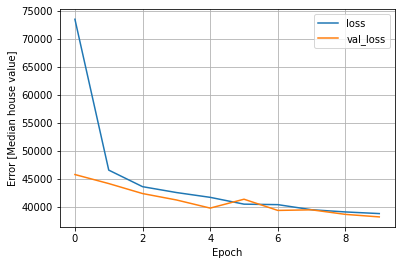

In [122]:
plot_loss(history)

In [123]:
test_results['15_layers'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
y_Ax.append(test_results['15_layers'])
test_predictions = dnn_model.predict(test_features).flatten()

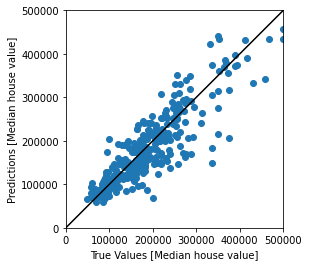

In [124]:
plot_true_vs_pred(test_predictions)

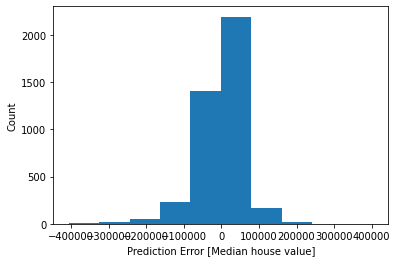

In [125]:
plot_error_distribution(test_predictions)

# Task 1 - Variation 3 (60 layers)

In [126]:
dnn_model = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

dnn_model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [127]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2, epochs=10, verbose=0)

CPU times: user 57.2 s, sys: 4.07 s, total: 1min 1s
Wall time: 44.2 s


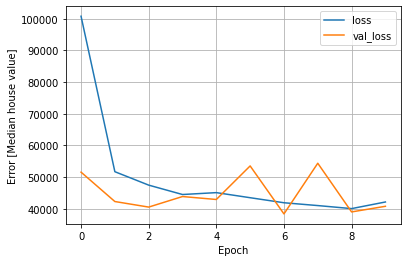

In [128]:
plot_loss(history)

In [129]:
test_results['60_layers'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
y_Ax.append(test_results['60_layers'])
test_predictions = dnn_model.predict(test_features).flatten()

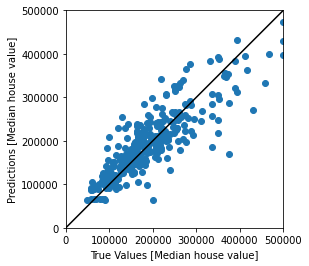

In [130]:
plot_true_vs_pred(test_predictions)

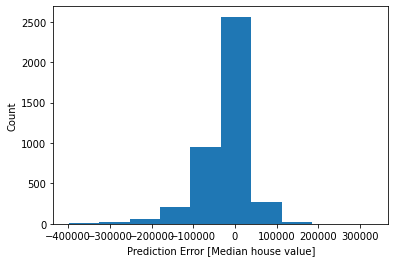

In [131]:
plot_error_distribution(test_predictions)

# Task 1 - Comparison graph

In [132]:
pd.DataFrame(test_results, index=['Mean absolute error [Median house value]']).T

,Mean absolute error [Median house value]
1_layer,202878.109375
15_layers,38664.515625
60_layers,40341.902344


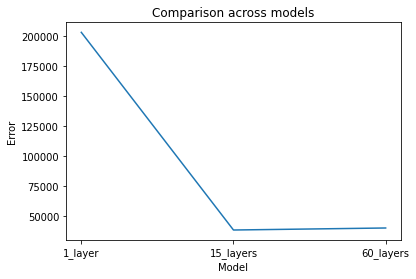

In [133]:
x_Ax = ["1_layer", "15_layers", "60_layers"]

plt.plot(x_Ax, y_Ax)
plt.xlabel('Model')
plt.ylabel('Error')
plt.title('Comparison across models')
plt.show()

# Task 2 - Variation 1 (3 layers - 1 unit)

In [134]:
test_results = {}
y_Ax = []

In [135]:
dnn_model = keras.Sequential([
      normalizer,
      layers.Dense(1, activation='relu'),
      layers.Dense(1, activation='relu'),
      layers.Dense(1, activation='relu'),
      layers.Dense(1)
  ])

dnn_model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [136]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2, epochs=10, verbose=0)

CPU times: user 7.72 s, sys: 537 ms, total: 8.26 s
Wall time: 6.96 s


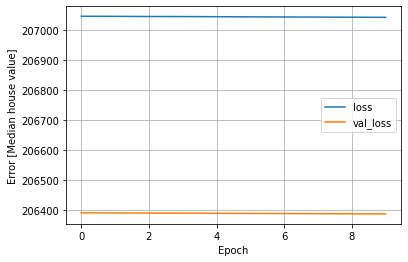

In [137]:
plot_loss(history)

In [138]:
test_results['1_unit'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
y_Ax.append(test_results['1_unit'])
test_predictions = dnn_model.predict(test_features).flatten()

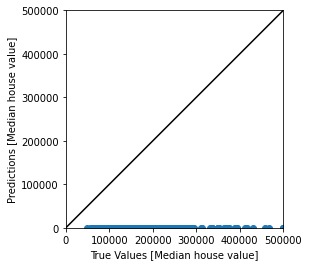

In [139]:
plot_true_vs_pred(test_predictions)

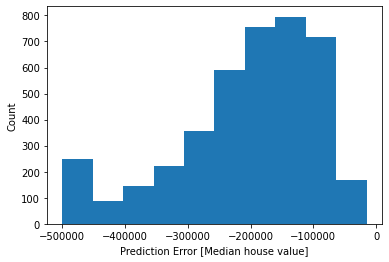

In [140]:
plot_error_distribution(test_predictions)

# Task 2 - Variation 2 (3 layers - 16 units)

In [141]:
dnn_model = keras.Sequential([
      normalizer,
      layers.Dense(16, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(1)
  ])

dnn_model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [142]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2, epochs=10, verbose=0)

CPU times: user 8.12 s, sys: 584 ms, total: 8.71 s
Wall time: 7.41 s


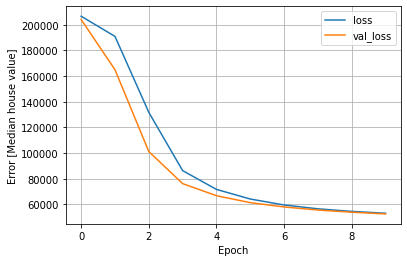

In [143]:
plot_loss(history)

In [144]:
test_results['16_units'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
y_Ax.append(test_results['16_units'])
test_predictions = dnn_model.predict(test_features).flatten()

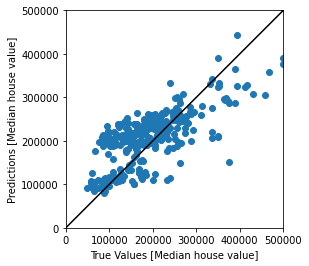

In [145]:
plot_true_vs_pred(test_predictions)

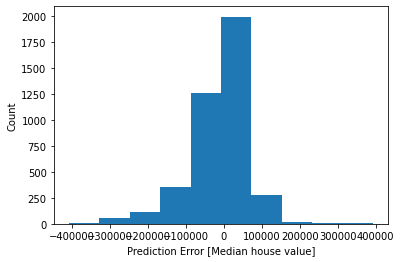

In [146]:
plot_error_distribution(test_predictions)

# Task 2 - Variation 3 (3 layers - 80 units)

In [147]:
dnn_model = keras.Sequential([
      normalizer,
      layers.Dense(80, activation='relu'),
      layers.Dense(80, activation='relu'),
      layers.Dense(80, activation='relu'),
      layers.Dense(1)
  ])

dnn_model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [148]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2, epochs=10, verbose=0)

CPU times: user 10.2 s, sys: 838 ms, total: 11.1 s
Wall time: 10.7 s


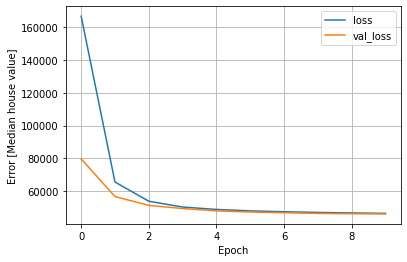

In [149]:
plot_loss(history)

In [150]:
test_results['80_units'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
y_Ax.append(test_results['80_units'])
test_predictions = dnn_model.predict(test_features).flatten()

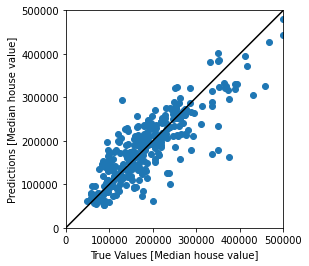

In [151]:
plot_true_vs_pred(test_predictions)

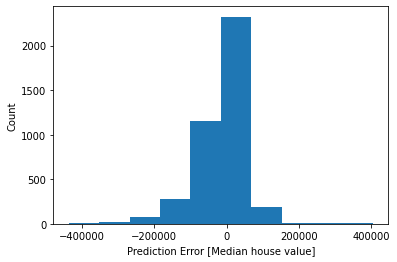

In [152]:
plot_error_distribution(test_predictions)

# Task 2 - Variation 4 (3 layers - 240 units)

In [153]:
dnn_model = keras.Sequential([
      normalizer,
      layers.Dense(240, activation='relu'),
      layers.Dense(240, activation='relu'),
      layers.Dense(240, activation='relu'),
      layers.Dense(1)
  ])

dnn_model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [154]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2, epochs=10, verbose=0)

CPU times: user 16.1 s, sys: 1.1 s, total: 17.3 s
Wall time: 12.3 s


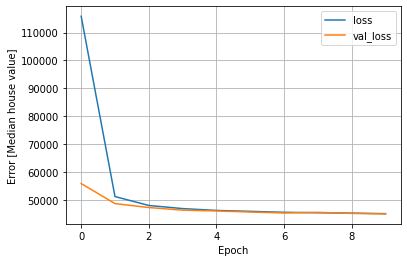

In [155]:
plot_loss(history)

In [156]:
test_results['240_units'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
y_Ax.append(test_results['240_units'])
test_predictions = dnn_model.predict(test_features).flatten()

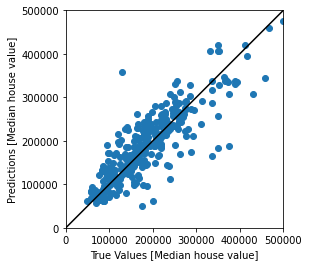

In [157]:
plot_true_vs_pred(test_predictions)

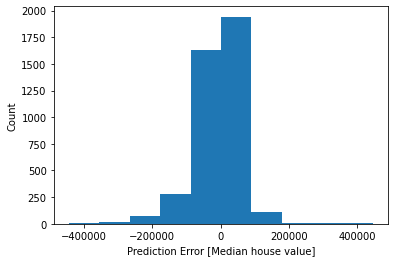

In [158]:
plot_error_distribution(test_predictions)

# Task 2 - Variation 5 (3 layers - 432 units)

In [159]:
dnn_model = keras.Sequential([
      normalizer,
      layers.Dense(432, activation='relu'),
      layers.Dense(432, activation='relu'),
      layers.Dense(432, activation='relu'),
      layers.Dense(1)
  ])

dnn_model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [160]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2, epochs=10, verbose=0)

CPU times: user 36.3 s, sys: 2.67 s, total: 38.9 s
Wall time: 41.4 s


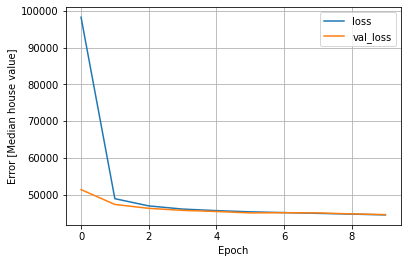

In [161]:
plot_loss(history)

In [162]:
test_results['432_units'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
y_Ax.append(test_results['432_units'])
test_predictions = dnn_model.predict(test_features).flatten()

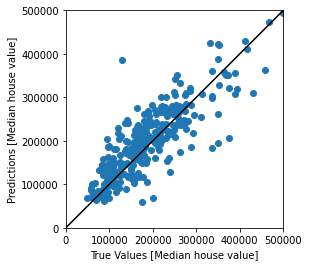

In [163]:
plot_true_vs_pred(test_predictions)

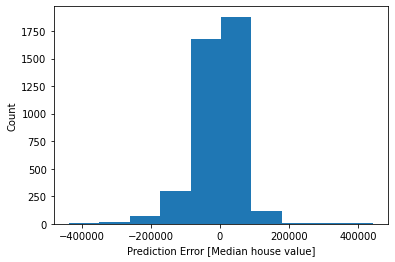

In [164]:
plot_error_distribution(test_predictions)

# Task 2 - Variation 6 (3 layers - 1120 units)

In [165]:
dnn_model = keras.Sequential([
      normalizer,
      layers.Dense(1120, activation='relu'),
      layers.Dense(1120, activation='relu'),
      layers.Dense(1120, activation='relu'),
      layers.Dense(1)
  ])

dnn_model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [166]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2, epochs=10, verbose=0)

CPU times: user 3min 27s, sys: 9.22 s, total: 3min 36s
Wall time: 2min


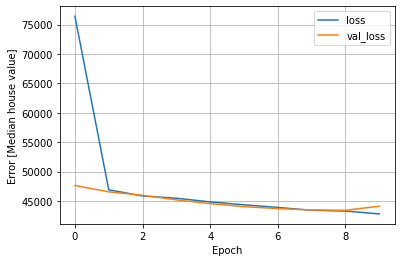

In [167]:
plot_loss(history)

In [168]:
test_results['1120_units'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
y_Ax.append(test_results['1120_units'])
test_predictions = dnn_model.predict(test_features).flatten()

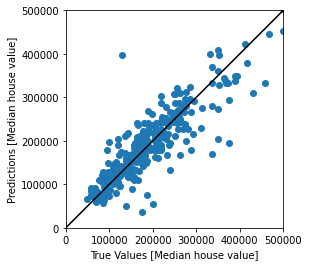

In [169]:
plot_true_vs_pred(test_predictions)

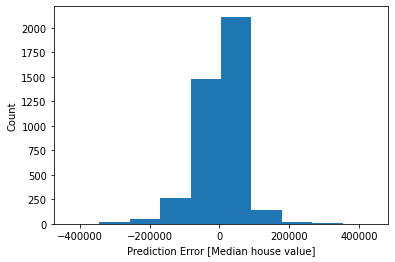

In [170]:
plot_error_distribution(test_predictions)

# Task 2 - Variation 7 (3 layers - 2240 units)

In [171]:
dnn_model = keras.Sequential([
      normalizer,
      layers.Dense(2240, activation='relu'),
      layers.Dense(2240, activation='relu'),
      layers.Dense(2240, activation='relu'),
      layers.Dense(1)
  ])

dnn_model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [172]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2, epochs=10, verbose=0)

CPU times: user 12min 23s, sys: 15.2 s, total: 12min 38s
Wall time: 6min 42s


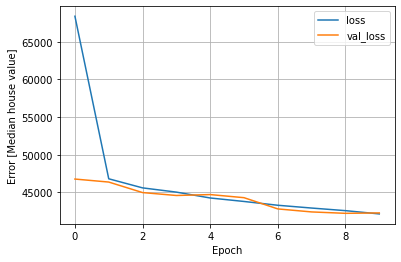

In [173]:
plot_loss(history)

In [174]:
test_results['2240_units'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
y_Ax.append(test_results['2240_units'])
test_predictions = dnn_model.predict(test_features).flatten()

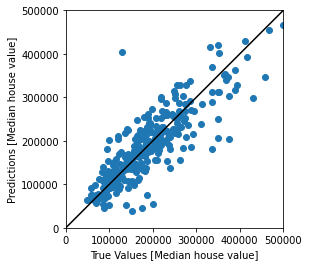

In [175]:
plot_true_vs_pred(test_predictions)

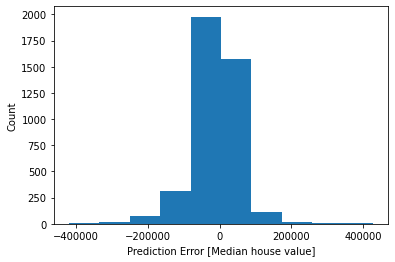

In [176]:
plot_error_distribution(test_predictions)

# Task 2 - Variation 8 (3 layers - 2, 64, 96 units)

In [177]:
dnn_model = keras.Sequential([
      normalizer,
      layers.Dense(2, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(96, activation='relu'),
      layers.Dense(1)
  ])

dnn_model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [178]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2, epochs=10, verbose=0)

CPU times: user 11.2 s, sys: 733 ms, total: 11.9 s
Wall time: 10.8 s


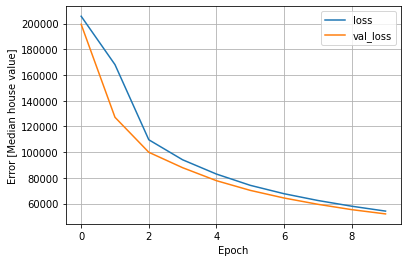

In [179]:
plot_loss(history)

In [180]:
test_results['2_64_96_units'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
y_Ax.append(test_results['2_64_96_units'])
test_predictions = dnn_model.predict(test_features).flatten()

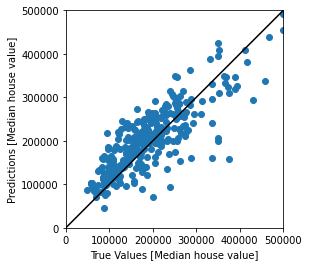

In [181]:
plot_true_vs_pred(test_predictions)

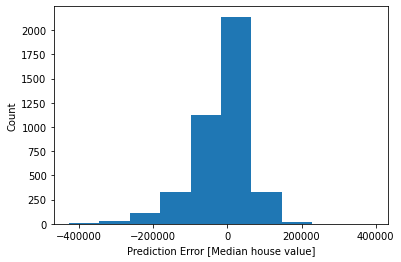

In [182]:
plot_error_distribution(test_predictions)

# Task 2 - Variation 9 (3 layers - 256, 112, 32 units)

In [183]:
dnn_model = keras.Sequential([
      normalizer,
      layers.Dense(256, activation='relu'),
      layers.Dense(112, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(1)
  ])

dnn_model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [184]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2, epochs=10, verbose=0)

CPU times: user 12.3 s, sys: 871 ms, total: 13.2 s
Wall time: 10.7 s


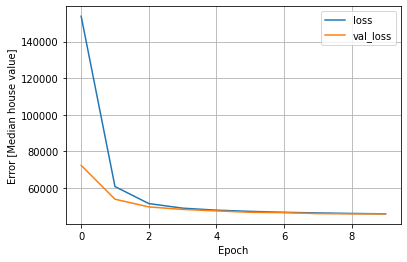

In [185]:
plot_loss(history)

In [186]:
test_results['256_112_32_units'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
y_Ax.append(test_results['256_112_32_units'])
test_predictions = dnn_model.predict(test_features).flatten()

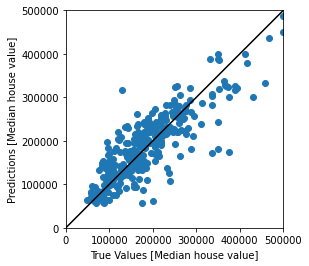

In [187]:
plot_true_vs_pred(test_predictions)

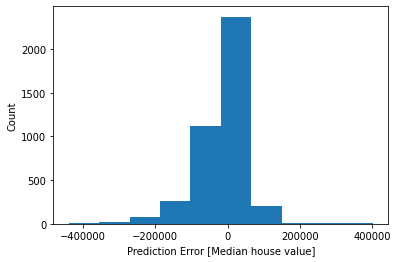

In [188]:
plot_error_distribution(test_predictions)

# Task 2 - Variation 10 (3 layers - 432, 1120, 2240 units)

In [189]:
dnn_model = keras.Sequential([
      normalizer,
      layers.Dense(432, activation='relu'),
      layers.Dense(1120, activation='relu'),
      layers.Dense(2240, activation='relu'),
      layers.Dense(1)
  ])

dnn_model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [190]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2, epochs=10, verbose=0)

CPU times: user 4min 3s, sys: 6.76 s, total: 4min 9s
Wall time: 2min 16s


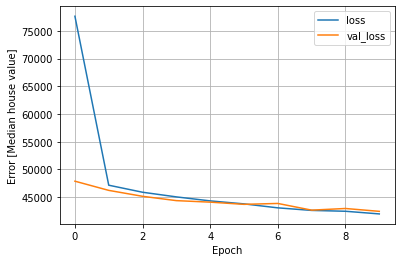

In [191]:
plot_loss(history)

In [192]:
test_results['432_1120_2240_units'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
y_Ax.append(test_results['432_1120_2240_units'])
test_predictions = dnn_model.predict(test_features).flatten()

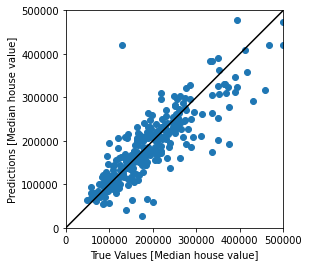

In [193]:
plot_true_vs_pred(test_predictions)

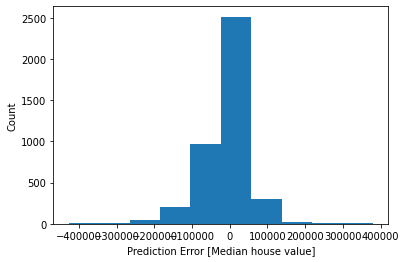

In [194]:
plot_error_distribution(test_predictions)

# Task 2 - Comparison graph

In [195]:
pd.DataFrame(test_results, index=['Mean absolute error [Median house value]']).T

,Mean absolute error [Median house value]
1_unit,206653.453125
16_units,52503.707031
80_units,46371.011719
240_units,45246.339844
432_units,45051.640625
1120_units,44271.515625
2240_units,42219.316406
2_64_96_units,53264.656250
256_112_32_units,45948.292969
432_1120_2240_units,42278.949219


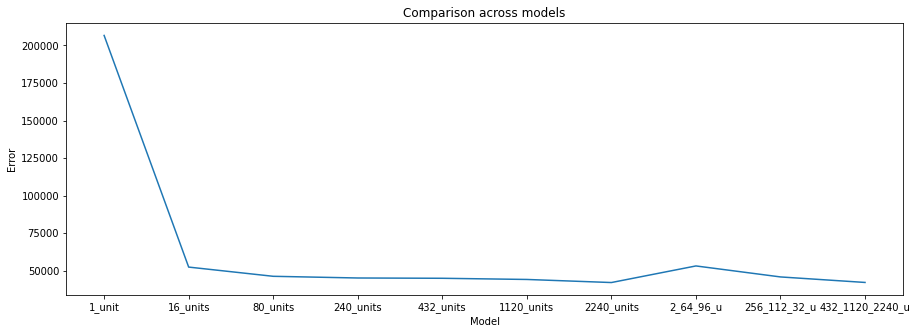

In [196]:
x_Ax = ["1_unit", "16_units", "80_units", "240_units", "432_units", "1120_units", "2240_units", "2_64_96_u", "256_112_32_u", "432_1120_2240_u"]

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

plt.plot(x_Ax, y_Ax)
plt.xlabel('Model')
plt.ylabel('Error')
plt.title('Comparison across models')
plt.show()